 # This notebook discussed Context-Free Grammars
 
 ## and also how to "run" CFGs by directly converting them to PDA and running those PDA
 
 ## Some Youtube Videos from the past can help follow this notebook
 
 ## They are presented "in context" below

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import * 
from jove.Def_md2mc     import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



# YOUTUBE Video of CFG Basics and how to directly parse using PDA

## Direct path: https://youtu.be/bymg3MDe6Y4 (31 min mark)

## From about the 30th-minute mark, the video below discusses the grammar

## S -> aSa | bSb | epsilon,  for $\{w w^R \;:\; w\in\{a,b\}^ \}$

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('bymg3MDe6Y4')

 # This video (direct path https://youtu.be/N5wQovKIZGM) discusses
 
 ## Consistency/Completeness
 ## Linearity
 ## Ambiguity

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('N5wQovKIZGM')

## Let us run the "direct simulation of CFG from PDA" below for the above grammar

### Notice how we encode each grammar rule DIRECTLY as a PDA transition

### These PDA always have the *SAME* I to W and W to F moves ... 

### Only the W to W moves vary; and here, they have transitions that go by the CFG

### There are always $a\in\Sigma$ transitions that drain every $a\in\Sigma$, matching it with an incoming $a$

Generating LALR tables


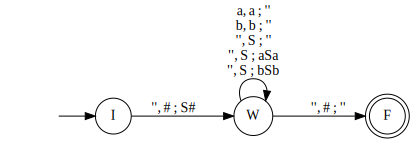

In [2]:
wwR = md2mc('''
PDA
!!-- The CFG to be simulated
!!-- S -> aSa | bSb | ''

!!-- This move is the same for any CFG
I : '',#; S# -> W

!!-- These moves imitate the CFG productions directly
W : '',S; aSa -> W
W : '',S; bSb -> W
W : '',S; ''  -> W

!!-- Transitions for every member of Sigma
W : a,a; '' -> W
W : b,b; '' -> W

!!-- This transition is also there for every CFG
W : '',#; ''   -> F
''')
dotObj_pda(wwR, FuseEdges=True)

In [3]:
explore_pda('aabaabaa', wwR)

String aabaabaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', 'aabaabaa', '#')
->  ('W', 'aabaabaa', 'S#')
->  ('W', 'aabaabaa', 'aSa#')
->  ('W', 'abaabaa', 'Sa#')
->  ('W', 'abaabaa', 'aSaa#')
->  ('W', 'baabaa', 'Saa#')
->  ('W', 'baabaa', 'bSbaa#')
->  ('W', 'aabaa', 'Sbaa#')
->  ('W', 'aabaa', 'aSabaa#')
->  ('W', 'abaa', 'Sabaa#')
->  ('W', 'abaa', 'abaa#')
->  ('W', 'baa', 'baa#')
->  ('W', 'aa', 'aa#')
->  ('W', 'a', 'a#')
->  ('W', '', '#')
->  ('F', '', '') .


# Animation of PDA

In [4]:
from jove.AnimatePDA import *
AnimatePDA(wwR, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

 "help(AnimatePDA)" gives you info on how to use animations with PDA 


# Animation Panel for all Machines (access PDA)
## You may do the above animation here
#### Access the PDA panel and key-in the definition of wwR in there

In [5]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


## The explore_pda call below fails because the string is not of the form $ww^R$ 
### Here you must use explore_pda, not animation to further investigate

In [6]:

explore_pda('aabaaaba', wwR)

String aabaaaba rejected by your PDA :-(
Visited states are:
{('W', 'aaaba', 'baa#'), ('W', 'baaaba', 'bSbaa#'), ('W', 'a', 'bSbbaaabaa#'), ('W', 'abaaaba', 'bSba#'), ('W', 'aaba', 'abaa#'), ('I', 'aabaaaba', '#'), ('W', '', 'bSbabaaabaa#'), ('W', 'ba', 'bSbaaabaa#'), ('W', 'aaaba', 'bSbbaa#'), ('W', 'aabaaaba', 'S#'), ('W', 'ba', 'aaabaa#'), ('W', 'abaaaba', 'aSaa#'), ('W', 'aaaba', 'aSabaa#'), ('W', 'aaaba', 'Sbaa#'), ('W', 'aabaaaba', 'bSb#'), ('W', 'baaaba', 'aSaaa#'), ('W', 'aba', 'aabaa#'), ('W', '', 'Sabaaabaa#'), ('W', 'a', 'aSabaaabaa#'), ('W', 'abaaaba', 'a#'), ('W', 'ba', 'Saaabaa#'), ('W', 'baaaba', '#'), ('W', 'abaaaba', 'Sa#'), ('W', 'aabaaaba', 'aSa#'), ('W', 'aba', 'Saabaa#'), ('W', 'aaba', 'aSaabaa#'), ('W', '', 'aSaabaaabaa#'), ('W', 'aaba', 'bSbabaa#'), ('W', 'aba', 'aSaaabaa#'), ('W', 'aba', 'baa#'), ('F', 'baaaba', ''), ('W', 'ba', 'aSaaaabaa#'), ('W', 'a', 'Sbaaabaa#'), ('W', 'ba', 'abaa#'), ('W', 'aabaaaba', '#'), ('W', 'baaaba', 'aa#'), ('W', '', 'abaaabaa#'), (

# An RE grammar and its PDA encoding

## Observe the number of parses possible
## This is a highly ambiguous grammar because
## there are many parses for the same input

In [7]:
repda = md2mc('''PDA
!!R -> R R | R + R | R* | ( R ) | 0 | 1 | e
I : '', #  ; R#  -> M
M : '', R  ; RR  -> M
M : '', R  ; R+R -> M
M : '', R  ; R*  -> M
M : '', R  ; (R) -> M
M : '', R  ; 0   -> M
M : '', R  ; 1   -> M
M : '', R  ; e   -> M
M : 0,  0  ; ''  -> M
M : 1,  1  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : e,  e  ; ''  -> M
M : '', #  ; #   -> F
'''
)


Generating LALR tables


In [8]:
repda

{'Q': {'F', 'I', 'M'},
 'Sigma': {'(', ')', '+', '0', '1', 'e'},
 'Gamma': {'#', '(', ')', '*', '+', '0', '1', 'R', 'e'},
 'Delta': {('I', '', '#'): {('M', 'R#')},
  ('M', '', 'R'): {('M', '(R)'),
   ('M', '0'),
   ('M', '1'),
   ('M', 'R*'),
   ('M', 'R+R'),
   ('M', 'RR'),
   ('M', 'e')},
  ('M', '0', '0'): {('M', '')},
  ('M', '1', '1'): {('M', '')},
  ('M', '(', '('): {('M', '')},
  ('M', ')', ')'): {('M', '')},
  ('M', '+', '+'): {('M', '')},
  ('M', 'e', 'e'): {('M', '')},
  ('M', '', '#'): {('F', '#')}},
 'q0': 'I',
 'z0': '#',
 'F': {'F'}}

In [9]:
DO_repda = dotObj_pda(repda, FuseEdges=True)

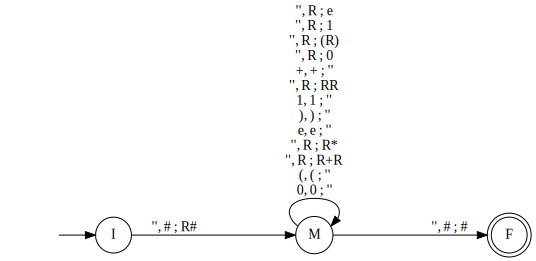

In [10]:
DO_repda

In [11]:
explore_pda("0", repda, STKMAX=4)

String 0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0', '#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [12]:
explore_pda("00", repda)

String 00 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00', '#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [13]:
explore_pda("(0)", repda)

String (0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)', '#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [14]:
explore_pda("(00)", repda)

String (00) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(00)', '#')
->  ('M', '(00)', 'R#')
->  ('M', '(00)', '(R)#')
->  ('M', '00)', 'R)#')
->  ('M', '00)', 'RR)#')
->  ('M', '00)', '0R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [25]:
explore_pda("(0)(0)", repda)

String (0)(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)(0)', '#')
->  ('M', '(0)(0)', 'R#')
->  ('M', '(0)(0)', 'RR#')
->  ('M', '(0)(0)', '(R)R#')
->  ('M', '0)(0)', 'R)R#')
->  ('M', '0)(0)', '0)R#')
->  ('M', ')(0)', ')R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [24]:
explore_pda("0+0", repda, STKMAX=3)

String 0+0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0+0', '#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [27]:
explore_pda("(0)+(0)", repda)

String (0)+(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)+(0)', '#')
->  ('M', '(0)+(0)', 'R#')
->  ('M', '(0)+(0)', 'R+R#')
->  ('M', '(0)+(0)', '(R)+R#')
->  ('M', '0)+(0)', 'R)+R#')
->  ('M', '0)+(0)', '0)+R#')
->  ('M', ')+(0)', ')+R#')
->  ('M', '+(0)', '+R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [28]:
explore_pda("00+0", repda)

String 00+0 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'R+R#')
->  ('M', '00+0', 'RR+R#')
->  ('M', '00+0', '0R+R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'RR#')
->  ('M', '00+0', '0R#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [29]:
explore_pda("000", repda, STKMAX=3)

String 000 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', '0R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', 'RRR#')
->  ('M', '000', '0RR#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [30]:
explore_pda("00+00", repda, STKMAX=4)

String 00+00 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', '0R#')
->  ('M', '0+00', 'R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [31]:
explore_pda("00+00", repda, STKMAX=5)

String 00+00 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', 'R+RR#')
->  ('M', '00+00', 'RR+RR#')
->  ('M', '00+00', '0R+RR#')
->  ('M', '0+00', 'R+RR#')
->  ('M', '0+00', '0+RR#')
->  ('M', '+00', '+RR#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '0

# PDA for well-balanced parentheses

Generating LALR tables


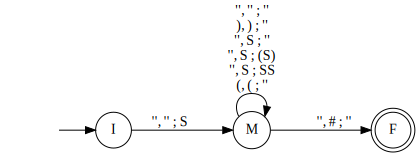

In [32]:
brpda1 = md2mc('''PDA

!!-- The CFG simulated is
!!-- S -> (S)|SS|''

!!-- Initial move to state M (was W above)
 I : '', '' ; S     -> M
 
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; ''    -> M
 
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 
 M : '',  ''  ; ''  -> M
 
 M : '', #  ; ''    -> F''')

dotObj_pda(brpda1, FuseEdges=True)

In [33]:
explore_pda("()(())", brpda1, STKMAX=5)

String ()(()) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', '()(())', '#')
->  ('M', '()(())', 'S#')
->  ('M', '()(())', 'SS#')
->  ('M', '()(())', '(S)S#')
->  ('M', ')(())', 'S)S#')
->  ('M', ')(())', ')S#')
->  ('M', '(())', 'S#')
->  ('M', '(())', '(S)#')
->  ('M', '())', 'S)#')
->  ('M', '())', '(S))#')
->  ('M', '))', 'S))#')
->  ('M', '))', '))#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '') .


# Ambiguous parsing of arithmetic expressions

In [34]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

Generating LALR tables


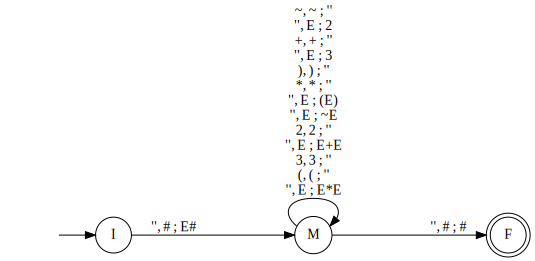

In [35]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [36]:
explore_pda("3+2*3", pdaEamb, STKMAX=5)

String 3+2*3 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+E#')
->  ('M', '3+2*3', '3+E#')
->  ('M', '+2*3', '+E#')
->  ('M', '2*3', 'E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [37]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 13 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+E#')
->  ('M', '3+2*3+2*3', 'E+E+E#')
->  ('M', '3+2*3+2*3', '3+E+E#')
->  ('M', '+2*3+2*3', '+E+E#')
->  ('M', '2*3+2*3', 'E+E#')
->  ('M', '2*3+2*3', 'E*E+E#')
->  ('M', '2*3+2*3', '2*E+E#')
->  ('M', '*3+2*3', '*E+E#')
->  ('M', '3+2*3', 'E+E#')
->  ('M', '3+2*3', '3+E#')
->  ('M', '+2*3', '+E#')
->  ('M', '2*3', 'E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+E#')
->  ('M', '3+2*3+2*3', 'E*E+E#')
->  ('M', '3+2*3+2*3', 'E+E*E+E#')
->  ('M', '3+2*3+2*3', '3+E*E+E#')
->  ('M', '+2*3+2*3', '+E*E+E#')
->  ('M', '2*3+2*3', 'E*E+E#')
->  ('M', '2*

# Disambiguated Arithmetic Expression Grammar

In [38]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

Generating LALR tables


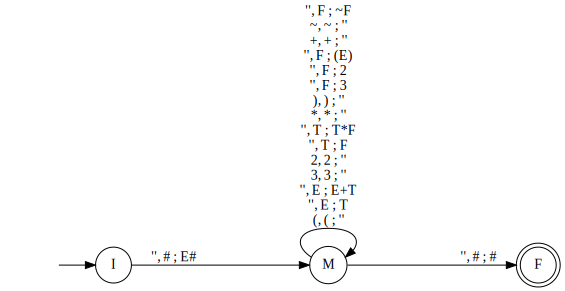

In [39]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [40]:
explore_pda("3+2*3", pdaE, STKMAX=7)

String 3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+T#')
->  ('M', '3+2*3', 'T+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [41]:
explore_pda("3+2*3+2*3", pdaE, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+T#')
->  ('M', '3+2*3+2*3', 'E+T+T#')
->  ('M', '3+2*3+2*3', 'T+T+T#')
->  ('M', '3+2*3+2*3', 'F+T+T#')
->  ('M', '3+2*3+2*3', '3+T+T#')
->  ('M', '+2*3+2*3', '+T+T#')
->  ('M', '2*3+2*3', 'T+T#')
->  ('M', '2*3+2*3', 'T*F+T#')
->  ('M', '2*3+2*3', 'F*F+T#')
->  ('M', '2*3+2*3', '2*F+T#')
->  ('M', '*3+2*3', '*F+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [42]:
explore_pda("3*2*~3+~~3*~3", pdaE, STKMAX=10)

String 3*2*~3+~~3*~3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E+T#')
->  ('M', '3*2*~3+~~3*~3', 'T+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'F*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', '3*F*F+T#')
->  ('M', '*2*~3+~~3*~3', '*F*F+T#')
->  ('M', '2*~3+~~3*~3', 'F*F+T#')
->  ('M', '2*~3+~~3*~3', '2*F+T#')
->  ('M', '*~3+~~3*~3', '*F+T#')
->  ('M', '~3+~~3*~3', 'F+T#')
->  ('M', '~3+~~3*~3', '~F+T#')
->  ('M', '3+~~3*~3', 'F+T#')
->  ('M', '3+~~3*~3', '3+T#')
->  ('M', '+~~3*~3', '+T#')
->  ('M', '~~3*~3', 'T#')
->  ('M', '~~3*~3', 'T*F#')
->  ('M', '~~3*~3', 'F*F#')
->  ('M', '~~3*~3', '~F*F#')
->  ('M', '~3*~3', 'F*F#')
->  ('M', '~3*~3', '~F*F#')
->  ('M', '3*~3', 'F*F#')
->  ('M', '3*~3', '3*F#')
->  ('M', '*~3', '*F#')
->  ('M', '~3', 'F#')
->  ('M', '~3', '~F#')
->  ('M'

In [43]:
explore_pda("3*2*~3+~~3*~3", pdaEamb, STKMAX=8)

  ('M', '3*2*~3+~~3*~3', 'E*E*E#')
->  ('M', '3*2*~3+~~3*~3', '3*E*E#')
->  ('M', '*2*~3+~~3*~3', '*E*E#')
->  ('M', '2*~3+~~3*~3', 'E*E#')
->  ('M', '2*~3+~~3*~3', '2*E#')
->  ('M', '*~3+~~3*~3', '*E#')
->  ('M', '~3+~~3*~3', 'E#')
->  ('M', '~3+~~3*~3', '~E#')
->  ('M', '3+~~3*~3', 'E#')
->  ('M', '3+~~3*~3', 'E+E#')
->  ('M', '3+~~3*~3', '3+E#')
->  ('M', '+~~3*~3', '+E#')
->  ('M', '~~3*~3', 'E#')
->  ('M', '~~3*~3', '~E#')
->  ('M', '~3*~3', 'E#')
->  ('M', '~3*~3', 'E*E#')
->  ('M', '~3*~3', '~E*E#')
->  ('M', '3*~3', 'E*E#')
->  ('M', '3*~3', '3*E#')
->  ('M', '*~3', '*E#')
->  ('M', '~3', 'E#')
->  ('M', '~3', '~E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E*E#')
->  ('M', '3*2*~3+~~3*~3', '3*E*E#')
->  ('M', '*2*~3+~~3*~3', '*E*E#')
->  ('M', '2*~3+~~3*~3', 'E*